In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib

In [2]:
# Patient file paths
patients = {
    1: ['Data/organized_fcs_data1a.csv', 'Data/organized_fcs_data1b.csv', 'Data/organized_fcs_data1c.csv'],
    2: ['Data/organized_fcs_data2a.csv', 'Data/organized_fcs_data2b.csv', 'Data/organized_fcs_data2c.csv'],
    3: ['Data/organized_fcs_data3a.csv', 'Data/organized_fcs_data3b.csv', 'Data/organized_fcs_data3c.csv'],
    4: ['Data/organized_fcs_data4a.csv', 'Data/organized_fcs_data4b.csv', 'Data/organized_fcs_data4c.csv'],
    5: ['Data/organized_fcs_data5a.csv', 'Data/organized_fcs_data5b.csv', 'Data/organized_fcs_data5c.csv'],
    6: ['Data/organized_fcs_data6a.csv', 'Data/organized_fcs_data6b.csv', 'Data/organized_fcs_data6c.csv'],
    7: ['Data/organized_fcs_data7.csv'],
    8: ['Data/organized_fcs_data8a.csv', 'Data/organized_fcs_data8b.csv', 'Data/organized_fcs_data8c.csv'],
    9: ['Data/organized_fcs_data9a.csv', 'Data/organized_fcs_data9b.csv'],
    10: ['Data/organized_fcs_data10a.csv', 'Data/organized_fcs_data10b.csv', 'Data/organized_fcs_data10c.csv'],
    11: ['Data/organized_fcs_data11.csv'],
    12: ['Data/organized_fcs_data12a.csv', 'Data/organized_fcs_data12b.csv', 'Data/organized_fcs_data12c.csv']
}

In [ ]:
def load_patient_data(patient_ids):
    all_data = []
    for pid in patient_ids:
        for file in patients[pid]:
            if os.path.exists(file):
                df = pd.read_csv(file)
                df = df.drop(columns=['Time'])  
                all_data.append(df.values)
            else:
                print(f"File not found: {file}")
    if all_data:
        return np.vstack(all_data)
    else:
        return np.empty((0, 14))


In [4]:
# Load healthy and unhealthy data
healthy_cells = load_patient_data([1, 2, 3, 4, 5, 6])
unhealthy_cells = load_patient_data([7, 8, 9, 10, 11, 12])

In [5]:
scaler = StandardScaler()
healthy_cells_scaled = scaler.fit_transform(healthy_cells)
unhealthy_cells_scaled = scaler.transform(unhealthy_cells)

In [7]:
def get_mean_feature_vectors(patient_ids):
    patient_vectors = []
    for pid in patient_ids:
        all_data = []
        for file in patients[pid]:
            if os.path.exists(file):
                df = pd.read_csv(file)
                df = df.drop(columns=['Time']) 
                scaled = scaler.transform(df.values)
                all_data.append(scaled)
        if all_data:
            patient_data = np.vstack(all_data)
            mean_vector = np.mean(patient_data, axis=0)
            patient_vectors.append(mean_vector)
        else:
            patient_vectors.append(np.zeros(14)) 
    return np.array(patient_vectors)

In [8]:
all_patient_ids = list(range(1, 13))
patient_vectors = get_mean_feature_vectors(all_patient_ids)

In [9]:
cos_sim_matrix = cosine_similarity(patient_vectors)

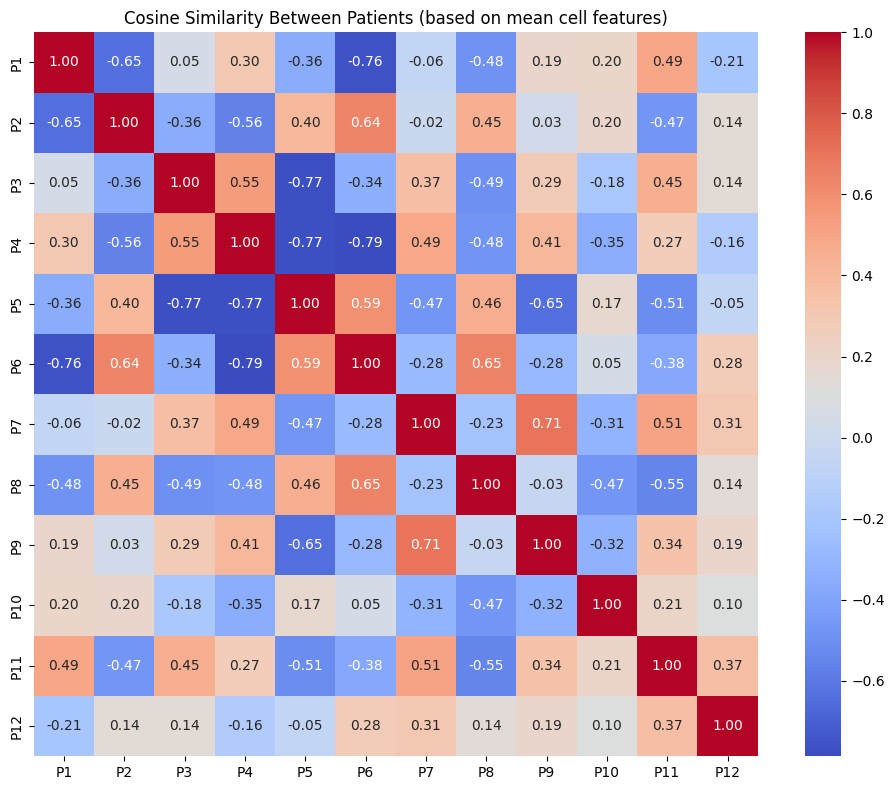

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(cos_sim_matrix, annot=True, fmt=".2f",
            xticklabels=[f"P{i}" for i in all_patient_ids],
            yticklabels=[f"P{i}" for i in all_patient_ids],
            cmap="coolwarm", square=True)
plt.title("Cosine Similarity Between Patients (based on mean cell features)")
plt.tight_layout()
plt.show()